In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import display


In [2]:
df = pd.read_csv('diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Stattical analysis

In [3]:
display(df.mean())
display(df.mode())
display(df.median())

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [4]:
desc = df.describe().round(2)
display(desc)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


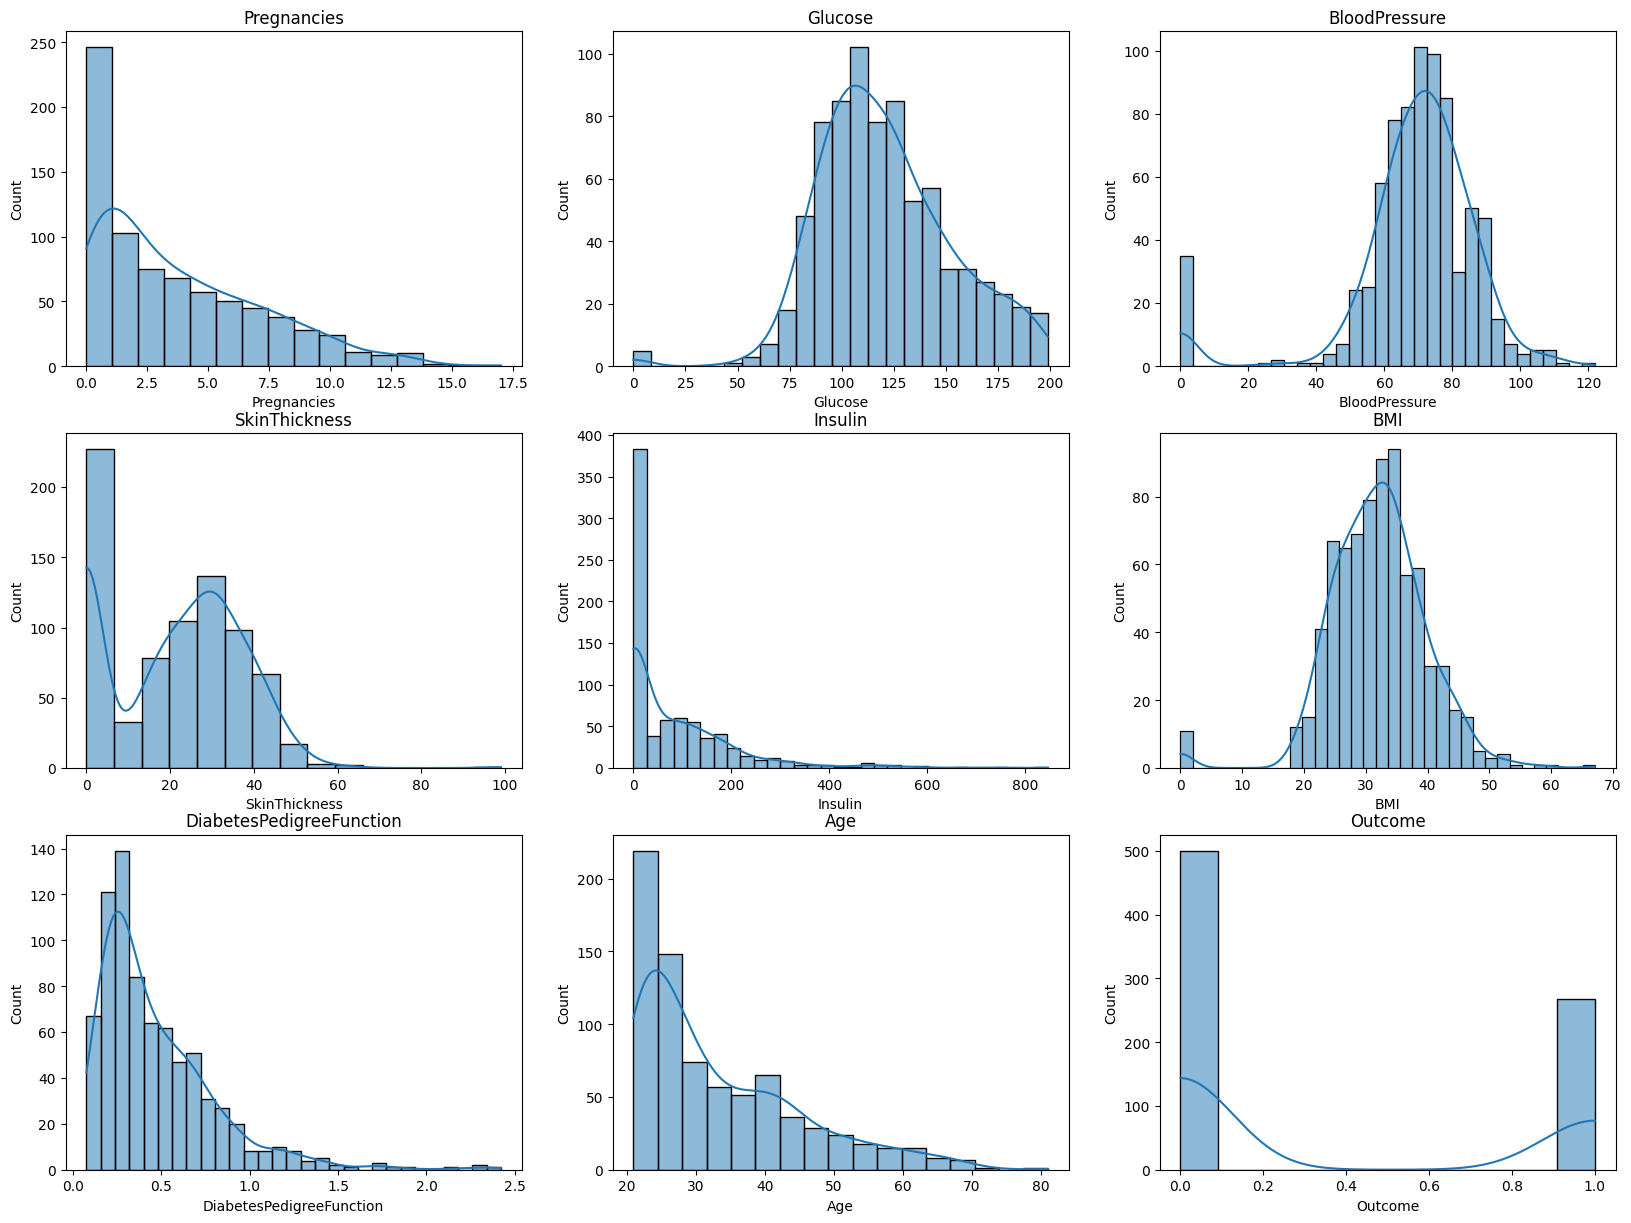

In [5]:
### Plottng distribution
plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)

### Correlation

In [6]:
correlation = df.corr().round(2)
display(correlation)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Pearson correlation Between Variables


,Column1,Column2,Pearson_Correlation
6,Pregnancies,Age,0.54
56,Age,Pregnancies,0.54
15,Glucose,Outcome,0.47
65,Outcome,Glucose,0.47
27,SkinThickness,Insulin,0.44


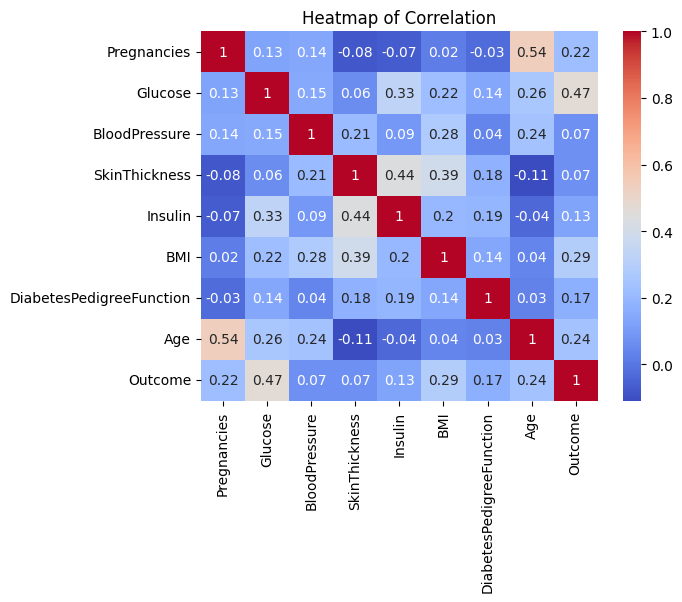

'Null values are'

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of outliers: 129


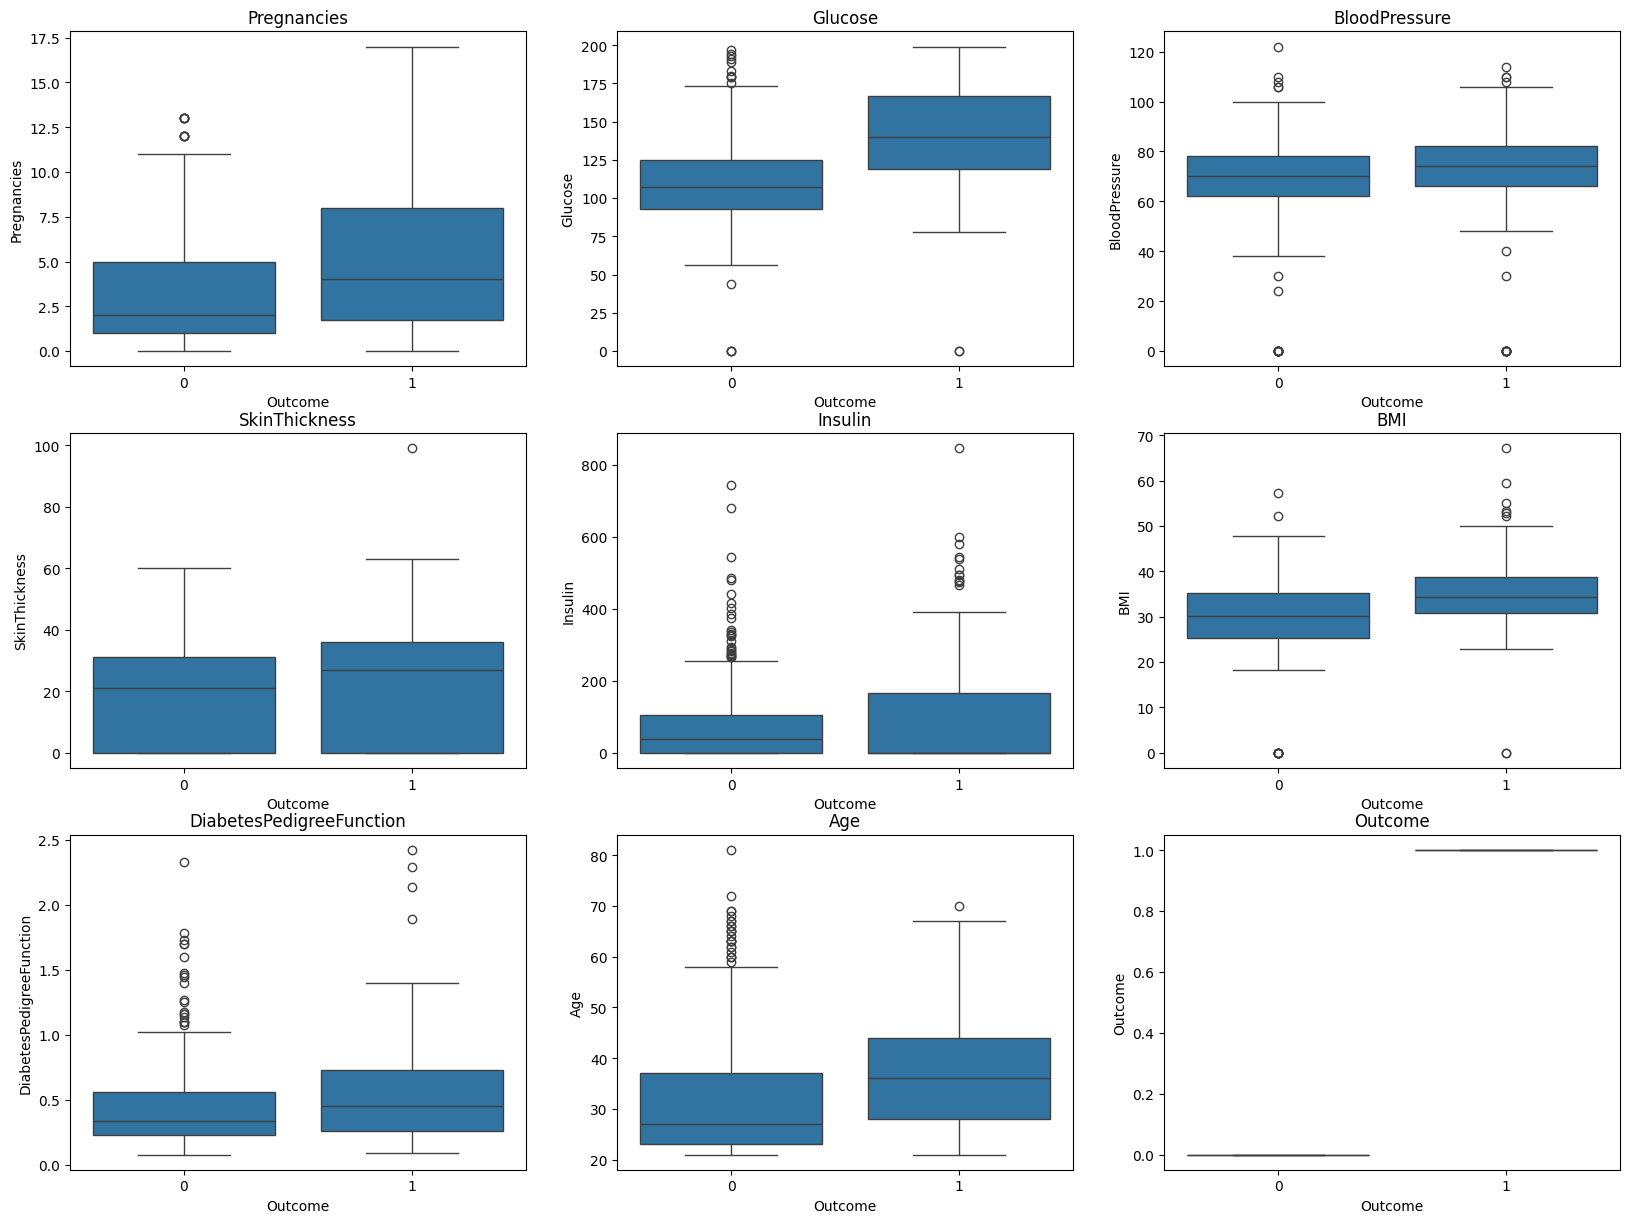

In [7]:
pearson_correlation = []
for column in df.columns:
    for other_column in df.columns:
        if column!= other_column:
            correlation_value = df[column].corr(df[other_column])
            pearson_correlation.append((column, other_column, correlation_value))

pearson_correlation_df = pd.DataFrame(pearson_correlation, columns=['Column1', 'Column2', 'Pearson_Correlation'])
print('Pearson correlation Between Variables')
display(pearson_correlation_df.sort_values(by='Pearson_Correlation', ascending=False).head().round(2))

heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

# ### Pairplot
# sns.pairplot(df, hue='Outcome')
# plt.show()

### Boxplot
plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[column], x=df['Outcome'])
    plt.title(column)


# ### Scatterplot
# plt.figure(figsize=(20,20))
# for i, column in enumerate(df.columns):
#     plt.subplot(4, 3, i+1)
#     sns.scatterplot(x=df[column], y=df['Outcome'], hue=df['Outcome'])
#     plt.title(column)
# plt.show()

### Handling missing values
display('Null values are')
missing_values = df.isnull().sum()
display(missing_values)

# ### Handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of outliers: {len(outliers)}')

In [8]:
### Person correlation and P values with Outcome column
from scipy import stats


pearson_correlation_outliers = []
for column in df.columns:
    if column!= 'Outcome':
        correlation_value, p_value = stats.pearsonr(df[column], df['Outcome'])
        pearson_correlation_outliers.append((column, correlation_value, p_value))


pearson_correlation_outliers_df = pd.DataFrame(pearson_correlation_outliers, columns=['Column', 'Pearson_Correlation', 'P_value'])  
display(pearson_correlation_outliers_df.sort_values(by='P_value', ascending=False).head(10).round(3))

### Feature selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

feature_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Feature_Scores']) 
display(feature_scores.sort_values(by='Feature_Scores', ascending=False))

selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)


,Column,Pearson_Correlation,P_value
2,BloodPressure,0.065,0.072
3,SkinThickness,0.075,0.038
4,Insulin,0.131,0.000
6,DiabetesPedigreeFunction,0.174,0.000
0,Pregnancies,0.222,0.000
7,Age,0.238,0.000
5,BMI,0.293,0.000
1,Glucose,0.467,0.000


,Feature_Scores
Glucose,213.161752
BMI,71.772072
Age,46.140611
Pregnancies,39.670227
DiabetesPedigreeFunction,23.871300
Insulin,13.281108
SkinThickness,4.304381
BloodPressure,3.256950


Selected features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


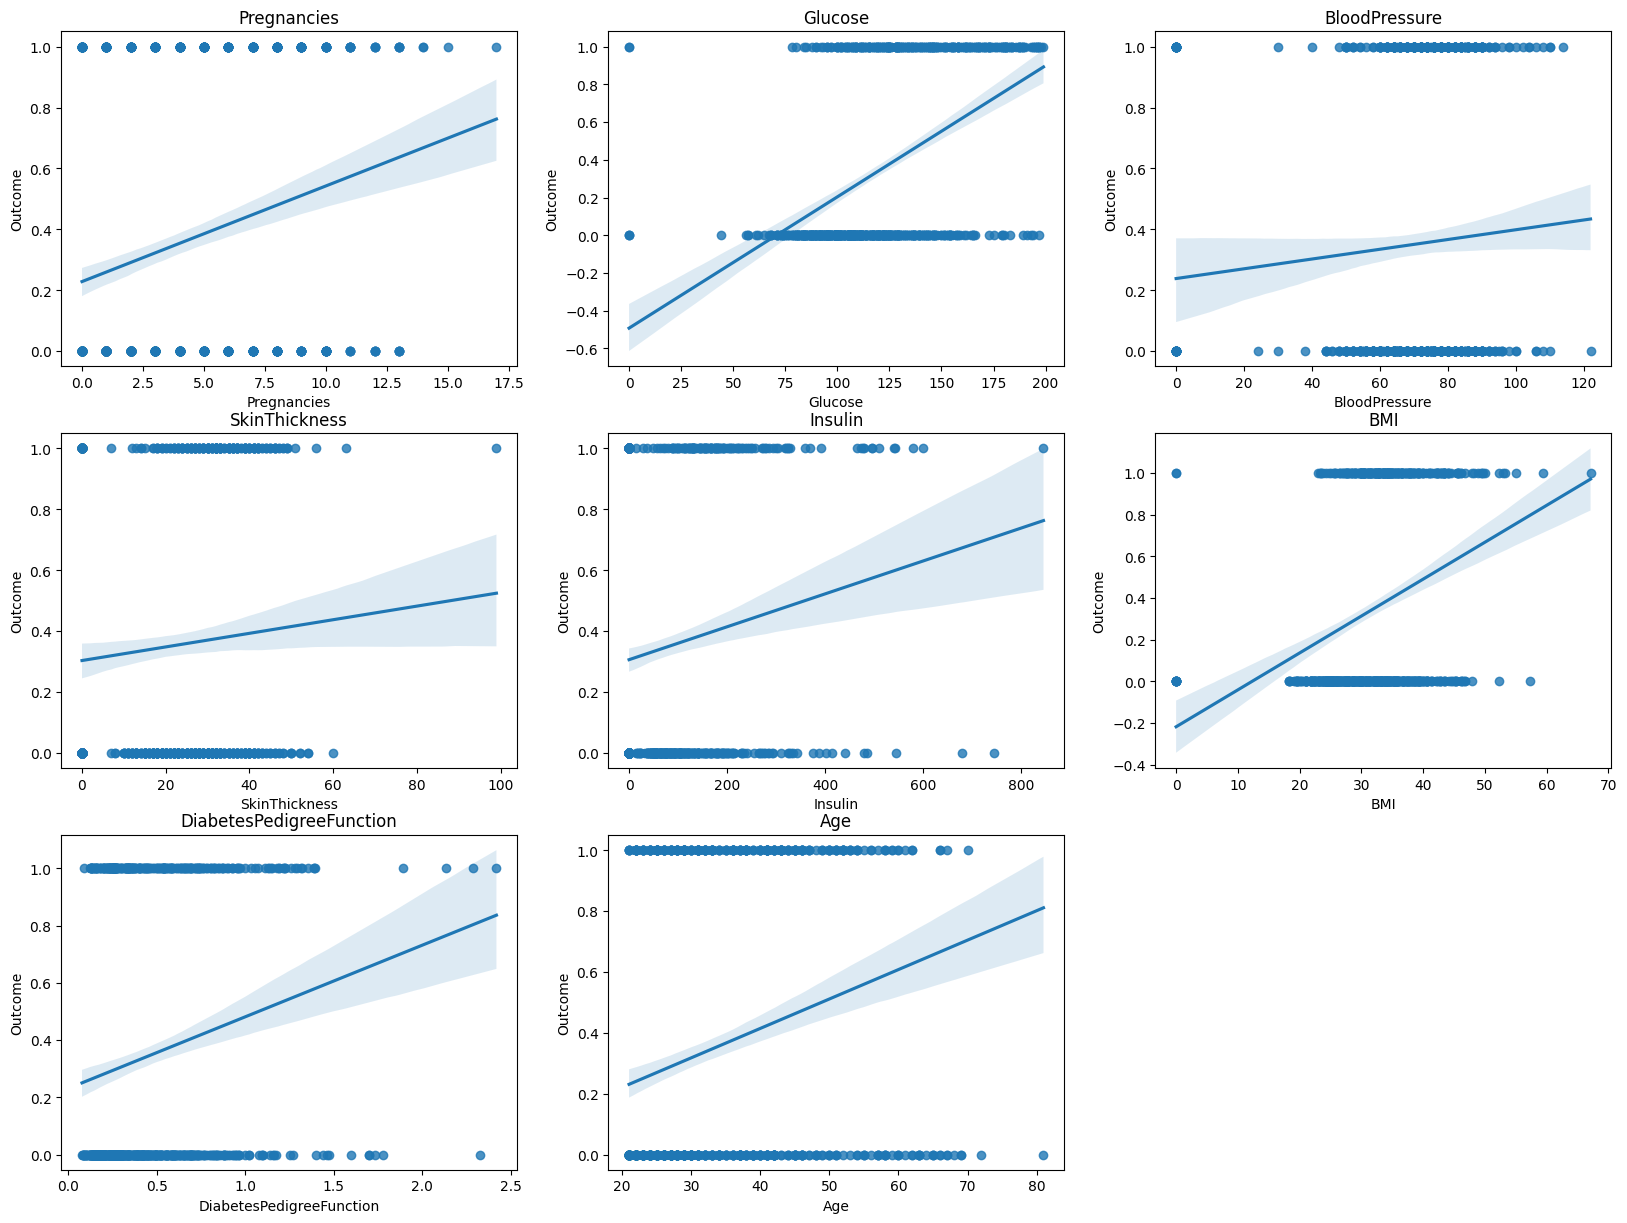

Slope of Pregnancies with Outcome: 0.031
Slope of Glucose with Outcome: 0.007
Slope of BloodPressure with Outcome: 0.002
Slope of SkinThickness with Outcome: 0.002
Slope of Insulin with Outcome: 0.001
Slope of BMI with Outcome: 0.018
Slope of DiabetesPedigreeFunction with Outcome: 0.25
Slope of Age with Outcome: 0.01


In [9]:
### regression plot
plt.figure(figsize=(20,20))
           
for i in enumerate(df.columns):
    if i[1]!= 'Outcome':
        plt.subplot(4, 3, i[0]+1)
        sns.regplot(x=df[i[1]], y=df['Outcome'])
        plt.title(i[1])
plt.show()

### slop values all columns with Outcome
from sklearn.linear_model import LinearRegression

for column in df.columns:
    if column!= 'Outcome':
        X = df[column].values.reshape(-1, 1)
        y = df['Outcome'].values.reshape(-1, 1)
        reg = LinearRegression().fit(X, y)
        slope = reg.coef_[0][0]
        print(f'Slope of {column} with Outcome: {slope.round(3)}')




In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
### Drop columns skinthickness, bloodpressure, and insuline
data = df.drop(columns=['SkinThickness', 'Insulin', 'BloodPressure'], axis=1)
display(df.head())
display(data.head())



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


### Data Modeling 

In [12]:
### Preprocessing, data scaling, and knn 
from sklearn.model_selection import train_test_split

# train test splitting
X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)



### Scalling the data 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train[:5], X_test[:5])
display(y_train[:5], y_test[:5])


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0.0,0.304,21,0
618,9,112,28.2,1.282,50,1
346,1,139,28.7,0.654,22,0
294,0,161,21.9,0.254,65,0
231,6,134,46.2,0.238,46,1


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,34.0,0.430,43,0
324,2,112,35.7,0.148,21,0
624,2,108,30.8,0.158,21,0
690,8,107,24.6,0.856,34,0
473,7,136,29.9,0.210,50,0


60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

### KNN

Accuracy Score: 0.9935064935064936
Confusion Matrix:
 [[99  0]
 [ 1 54]]


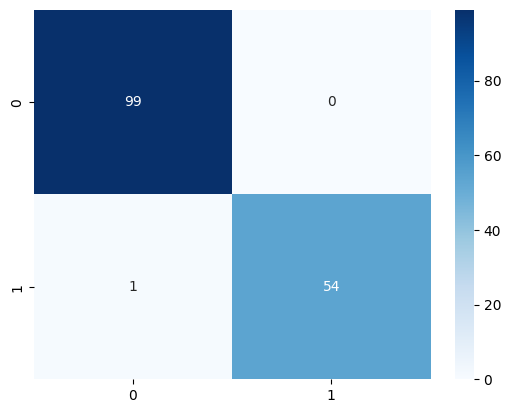

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model1= KNeighborsClassifier(n_neighbors= 3)
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

### KNN Hyper Parameter Tuning

In [15]:
knn_model = KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,7, 9 ,11,13, 15], 'weights':['uniform', 'distance ']}

In [16]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_model, param_grid = parameters, cv =5)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance ']})

In [17]:
best_knn_model = knn_grid.best_estimator_
print ('Knn - Hyper Parameters Optimization')

print ('Best Parameter: ', knn_grid.best_params_)
print ('Best Score: ', knn_grid.best_score_)
print ('Best Estimator: ', knn_grid.best_estimator_)
print ('Best Index: ', knn_grid.best_index_)
print ('Score: ', knn_grid.scorer_)
print ('CV result: ', knn_grid.cv_results_)



Knn - Hyper Parameters Optimization
Best Parameter:  {'n_neighbors': 9, 'weights': 'uniform'}
Best Score:  1.0
Best Estimator:  KNeighborsClassifier(n_neighbors=9)
Best Index:  6
Score:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>.score
CV result:  {'mean_fit_time': array([0.00129952, 0.00045662, 0.00122223, 0.00051103, 0.00120463,
       0.00048685, 0.00122628, 0.0005384 , 0.00123515, 0.00042062,
       0.00129447, 0.00058732, 0.00140953, 0.00045981]), 'std_fit_time': array([1.45954908e-04, 5.95946113e-05, 3.25546056e-05, 8.75715823e-05,
       4.69612223e-05, 7.73805487e-05, 4.70758315e-05, 1.46053782e-04,
       4.08865550e-05, 1.06724210e-05, 1.62887992e-04, 9.94814885e-05,
       2.58151816e-04, 5.58705034e-05]), 'mean_score_time': array([0.0074264 , 0.        , 0.00752811, 0.        , 0.00739832,
       0.        , 0.00754876, 0.        , 0.00770903, 0.        ,
       0.0077508 , 0.        , 0.00787206, 0.        ]), 'std_score_time': array([0.00034293, 0.  

Accuracy Score: 0.987012987012987
Confusion Matrix:
 [[98  1]
 [ 1 54]]


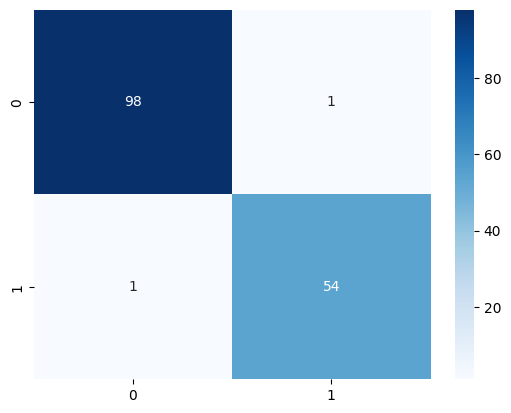

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model1= KNeighborsClassifier(n_neighbors= 9, weights=  'uniform')
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

### 